In [1]:
from utils.engine import StrategyEngine, GoalPriceIndex
from utils.data import YieldCurveBuilder, DataLoader
from utils.constant import PROFILS_TDF , PROFILS_FIXE_MIXED, INFLATION_SALAIRE, RETIREMENT_DATE ,ASSET_FILE ,YIELD_FILE,CLIENT_AGE_START, INITIAL_WEALTH, INITIAL_SALARY, SAVINGS_RATE, CONTRIB_START, AGE_PEAK, CONTRIB_PEAK, SIMULATION_START, SIMULATION_END, FLOOR_PERCENT
import pandas as pd
import matplotlib.pyplot as plt
from utils.helpers import print_simulation_summary

In [2]:

yc = YieldCurveBuilder().load_from_csv(YIELD_FILE)
assets = DataLoader.get_asset_returns(ASSET_FILE)
profil_fixe = PROFILS_FIXE_MIXED['EQUILIBRE']
profil_tdf = PROFILS_TDF['EQUILIBRE']
if yc and assets is not None:
    gpi = GoalPriceIndex(yc, RETIREMENT_DATE)
    
    
    engine1 = StrategyEngine(gpi, assets['US Equity USD Unhedged'], assets['US Government Bond USD Unhedged'],
                            SIMULATION_START, SIMULATION_END, INITIAL_WEALTH, INITIAL_SALARY, SAVINGS_RATE, INFLATION_SALAIRE)
    engine2 = StrategyEngine(gpi, assets[profil_tdf['equity']], assets[profil_tdf['bond']],
                            SIMULATION_START, SIMULATION_END, INITIAL_WEALTH, INITIAL_SALARY, SAVINGS_RATE, INFLATION_SALAIRE)
    
    engine3 = StrategyEngine(gpi, assets[profil_fixe['equity']], assets[profil_fixe['bond']],
                            SIMULATION_START, SIMULATION_END, INITIAL_WEALTH, INITIAL_SALARY, SAVINGS_RATE, INFLATION_SALAIRE)
    gbi_res = engine1.run_gbi(FLOOR_PERCENT,profil_tdf )
    tdf_res = engine2.run_tdf(profil_tdf)
    fixe_res = engine3.run_fixed_mix(profil_fixe['fixed_allocation'])
    


c:\Users\maxhe\Desktop\HSBC-Retirement-ALM\utils\data.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_path, index_col=0, parse_dates=True, na_values=['N/A', ''])


 Exécution GBI sur 279 mois...
 Simulation TDF (Profil: {'description': 'Balance risque/rendement, approche classique', 'equity': 'US Equity USD Unhedged', 'bond': 'USD Corporate Bond - USD Unhedged', 'allocation_initiale': 0.7, 'decroissance_annuelle': 0.01})...
 Simulation FIXED MIX (60/40)...


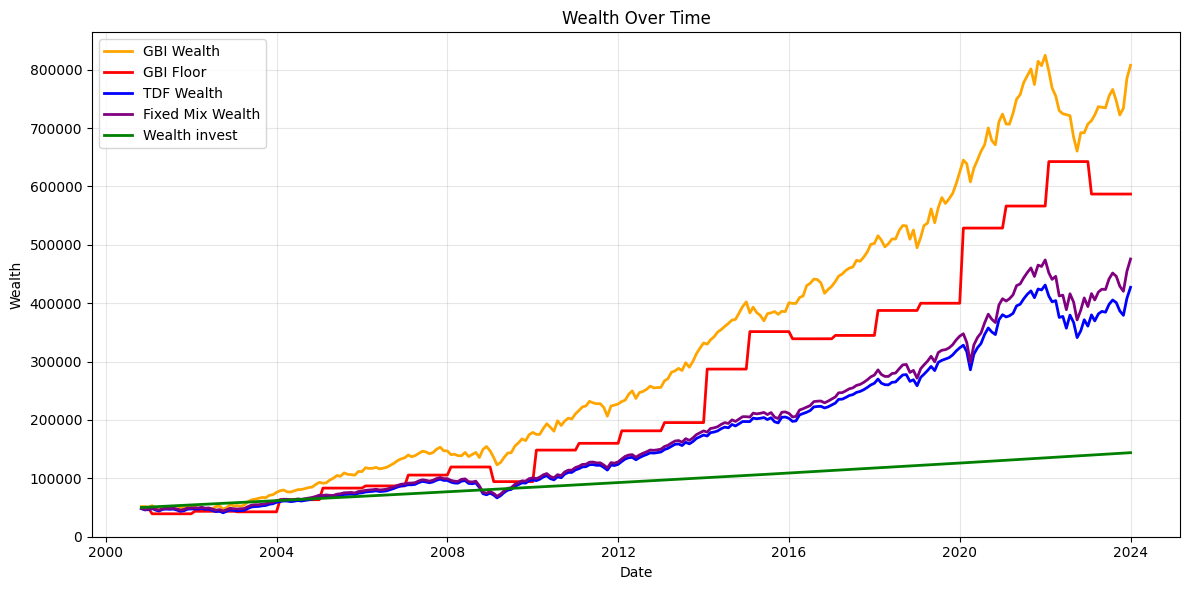

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(gbi_res.index, gbi_res['Wealth'], label='GBI Wealth', linewidth=2, color='orange')
plt.plot(gbi_res.index, gbi_res['Floor'], label='GBI Floor', linewidth=2, color='red')
plt.plot(tdf_res.index, tdf_res['Wealth'], label='TDF Wealth', linewidth=2, color='blue')
plt.plot(fixe_res.index, fixe_res['Wealth'], label='Fixed Mix Wealth', linewidth=2, color='purple')

plt.plot(gbi_res.index, gbi_res['Contrib_mensuel'].cumsum() + INITIAL_WEALTH, label='Wealth invest', linewidth=2, color='green')
plt.xlabel('Date')
plt.ylabel('Wealth')
plt.title('Wealth Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

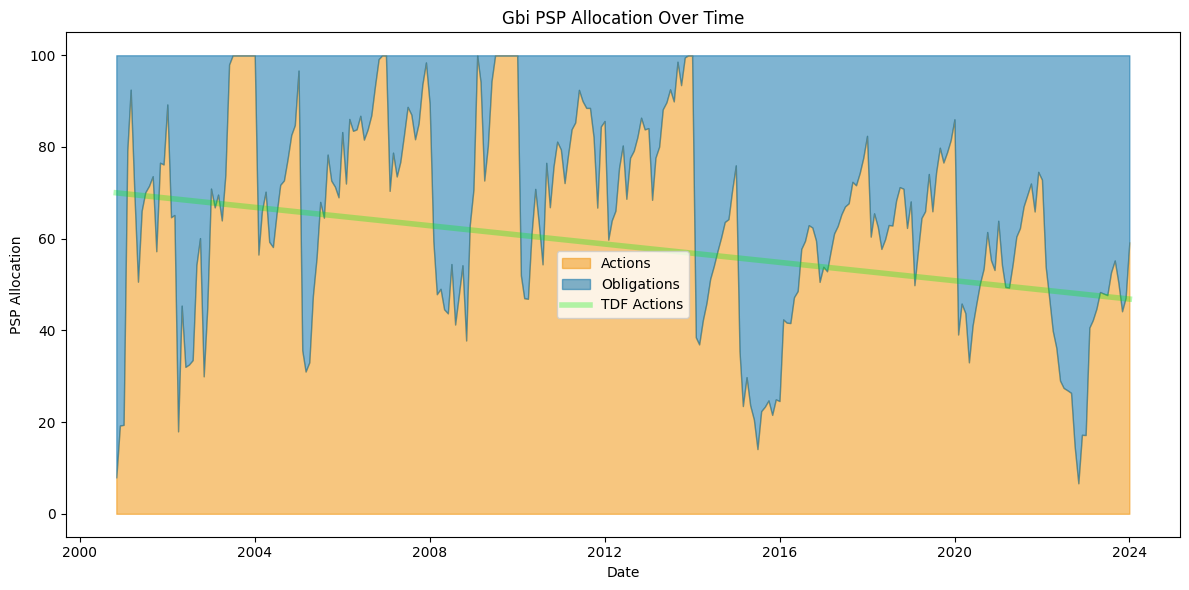

In [4]:
plt.figure(figsize=(12, 6))
plt.fill_between(gbi_res.index, 0, gbi_res['Allocation_PSP']*100, label='Actions',color='#F18F01', alpha=0.5)
plt.fill_between(gbi_res.index, gbi_res['Allocation_PSP']*100, 100, color='#006BA6', alpha=0.5, label='Obligations')
plt.plot(tdf_res.index, tdf_res['Allocation_PSP']*100, label='TDF Actions',color="#01F10D", alpha=0.3, linewidth=4)
plt.xlabel('Date')
plt.ylabel('PSP Allocation')
plt.title('Gbi PSP Allocation Over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
print_simulation_summary(gbi_res, "GBI (Goal-Based Investing)", INITIAL_WEALTH)
print_simulation_summary(tdf_res, "TDF (Target Date Fund)", INITIAL_WEALTH)
print_simulation_summary(fixe_res, "Fixed Mix", INITIAL_WEALTH)

  RÉSUMÉ : GBI (Goal-Based Investing)
 Capital Initial      : 50,000.00 €
 Total Versements     : 93,832.18 €
 TOTAL INVESTI        : 143,832.18 €
----------------------------------------
 CAPITAL FINAL        : 807,451.72 €
 Plus-Value           : 663,619.54 €
 Performance Globale  : +461.38 %

  RÉSUMÉ : TDF (Target Date Fund)
 Capital Initial      : 50,000.00 €
 Total Versements     : 93,832.18 €
 TOTAL INVESTI        : 143,832.18 €
----------------------------------------
 CAPITAL FINAL        : 427,128.02 €
 Plus-Value           : 283,295.84 €
 Performance Globale  : +196.96 %

  RÉSUMÉ : Fixed Mix
 Capital Initial      : 50,000.00 €
 Total Versements     : 93,832.18 €
 TOTAL INVESTI        : 143,832.18 €
----------------------------------------
 CAPITAL FINAL        : 475,647.15 €
 Plus-Value           : 331,814.97 €
 Performance Globale  : +230.70 %

